### Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load data

In [13]:
census = pd.read_csv("../../data/census/census_tract.csv")

# Removing missing rows with missing population values
census = census.drop(census[census.TotalPop == 0].index)

print("Shape of data", census.shape)
print("Columns", census.columns)
census.head()

Shape of data (73311, 37)
Columns Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


### Longest and Shortest County names

In [14]:
longest_county_name_on_census_dataset_index = np.argmax(census.County.map(len))
s_i = np.argmin(census.County.map(len))

census[(census.index == longest_county_name_on_census_dataset_index) | (census.index == s_i)]

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
590,1081040200,Alabama,Lee,5210,2881,2329,3.3,73.2,12.2,0.0,...,14.9,4.8,4.3,18.2,2691,66.6,26.3,5.4,1.7,4.4
1330,2198000100,Alaska,Prince of Wales-Hyder Census Area,2139,1274,865,0.5,58.0,0.1,31.8,...,25.6,10.4,3.0,15.2,954,50.8,39.6,9.4,0.1,14.3


### Largest income error

The income given can be off by as much as 123,116

In [15]:
max_income_err = np.argmax(census.IncomeErr)
max_income_err = census[census.index == max_income_err]

print(max_income_err.IncomeErr)
max_income_err

63909    123116.0
Name: IncomeErr, dtype: float64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
63909,48201210100,Texas,Harris,5799,5299,500,33.5,16.3,48.6,0.0,...,0.0,0.0,9.3,33.0,118,66.9,28.8,4.2,0.0,0.0


### Largest Income per cap error

The per capita income can be off by as much as 134,380.  I wonder if this indicates high income inequality

In [16]:
max_per_cap_err = np.argmax(census.IncomePerCapErr)
max_per_cap_err = census[census.index == max_per_cap_err]

print(max_per_cap_err.IncomePerCapErr)
max_per_cap_err

27513    134380.0
Name: IncomePerCapErr, dtype: float64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
27513,21067003916,Kentucky,Fayette,598,282,316,0.0,98.2,1.5,0.0,...,0.0,1.6,9.5,28.1,315,70.5,15.9,13.7,0.0,6.8


# Selected Counties

### Counties in California

In [70]:
state = "California"
census[census.State == state].County.value_counts().head(20)

Los Angeles       2326
San Diego          626
Orange             582
Riverside          452
Santa Clara        372
San Bernardino     368
Alameda            360
Sacramento         317
Contra Costa       207
Fresno             199
San Francisco      195
Ventura            173
San Mateo          156
Kern               151
San Joaquin        139
Sonoma              99
Solano              95
Stanislaus          94
Monterey            93
Santa Barbara       88
Name: County, dtype: int64

### Overview

In [107]:
counties = ["Santa Clara", "San Diego", "Monterey", "Alameda", "San Francisco", "Contra Costa", "Los Angeles"]

commute, income, income_percap, men, women = ([],[],[],[],[])
hispanic, white, black, native, asian, pacific = ([],[],[],[],[],[])

for county in counties:
    curr_county = census[census.County == county]

    commute.append(curr_county.MeanCommute.median())
    men.append(curr_county.Men.sum() / 1000)
    women.append(curr_county.Women.sum() / 1000)
    hispanic.append(((curr_county.Hispanic * curr_county.TotalPop) / 100000).sum())
    white.append(((curr_county.White * curr_county.TotalPop) / 100000).sum())
    black.append(((curr_county.Black * curr_county.TotalPop) / 100000).sum())
    native.append(((curr_county.Native * curr_county.TotalPop) / 100000).sum())
    asian.append(((curr_county.Asian * curr_county.TotalPop) / 100000).sum())
    pacific.append(((curr_county.Pacific * curr_county.TotalPop) / 100000).sum())
    income.append(curr_county.Income.median())
    income_percap.append(curr_county.IncomePerCap.median())

counties = pd.DataFrame({
                "Women": women,
                "Men": men,
                "Median Commute": commute,
                "Hispanic": hispanic,
                "White": white,
                "Black": black,
                "Native": native,
                "Asian": asian,
                "Pacific": pacific,
                "IncomePerCap": income_percap,
                "Income": income
            }, index=counties)

counties["Men to women"] = counties.Men / counties.Women
counties.head()

,Asian,Black,Hispanic,Income,IncomePerCap,Median Commute,Men,Native,Pacific,White,Women,Men to women
Santa Clara,626.084204,45.044374,497.096021,97832.0,43032.0,25.90,939.004,3.517091,6.229886,627.348056,929.145,1.010611
San Diego,362.505592,153.028657,1060.986419,63974.0,29876.5,25.00,1618.945,11.704634,13.484862,1515.345646,1604.151,1.009222
Monterey,25.217526,10.976058,243.887348,58250.0,22923.5,21.90,219.299,1.219249,1.953637,135.018274,209.142,1.048565
Alameda,436.266111,179.375374,358.167652,74096.0,35666.0,30.15,776.699,4.821192,13.265241,522.723766,808.284,0.960923
San Francisco,281.876728,44.899562,128.619425,82591.5,48314.0,31.70,427.909,1.504401,3.363267,346.739781,412.854,1.036466


### Selected County Comparison

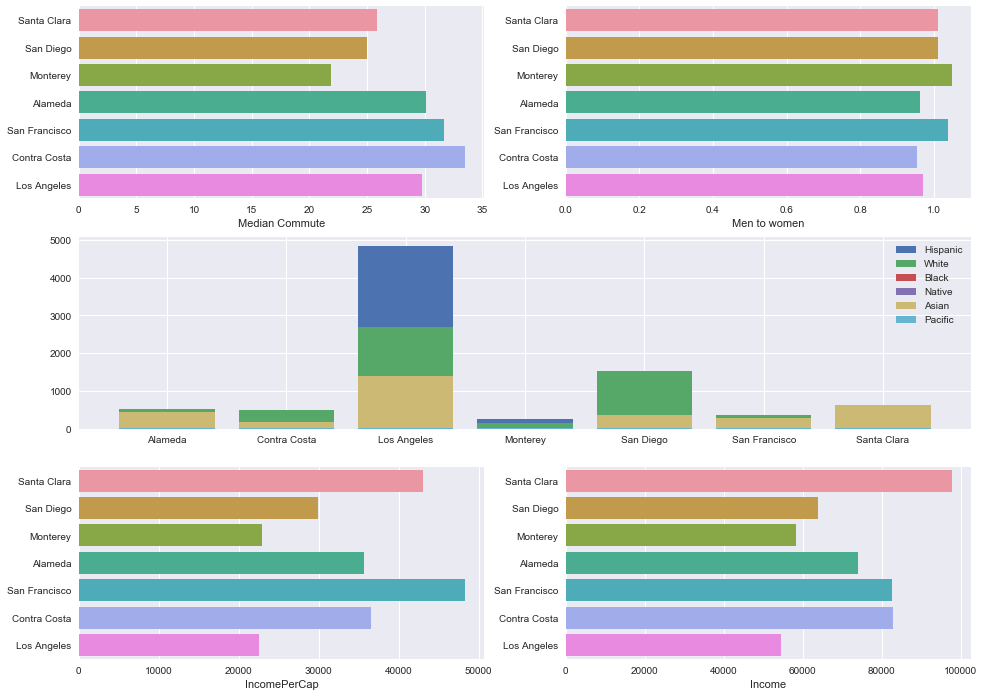

In [110]:
plt.figure(figsize=(16, 12))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax4 = plt.subplot2grid((3, 2), (2, 0))
ax5 = plt.subplot2grid((3, 2), (2, 1))

sns.barplot(counties["Median Commute"], counties.index, ax=ax1)
sns.barplot(counties["Men to women"], counties.index, ax=ax2)

races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for race in races:
    ax3.bar(counties.index, counties[race], label=race)
ax3.legend()

sns.barplot(counties["IncomePerCap"], counties.index, ax=ax4)
_ = sns.barplot(counties["Income"], counties.index, ax=ax5)

### Gender imbalance

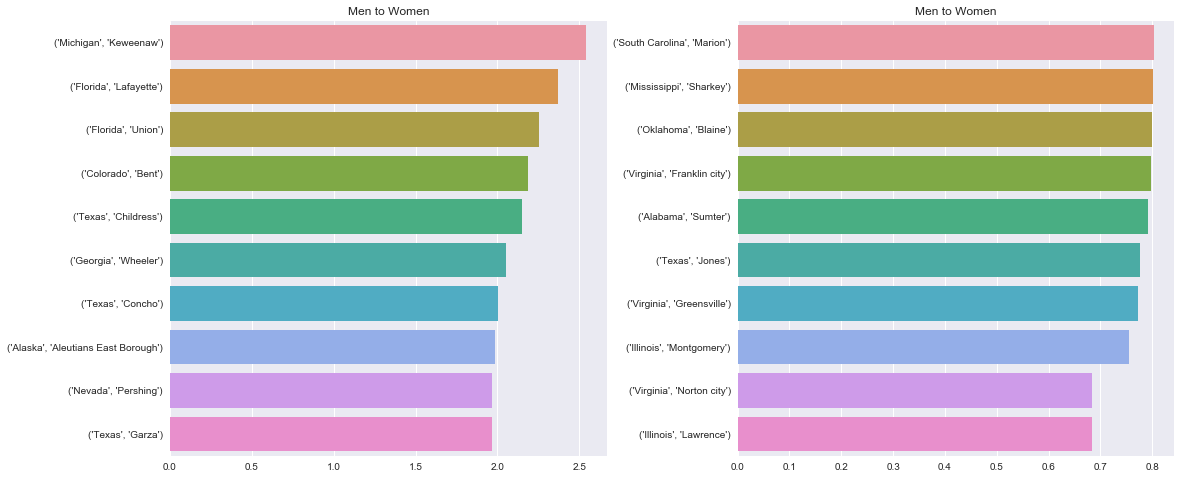

In [26]:
census["Men to women"] = census.Men / census.Women
ratio = census.groupby(["State", "County"])["Men to women"].median().sort_values(ascending=False)

fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(wspace=0.3)

data = ratio.head(10)
sns.barplot(x=data.values, y=data.index, ax=axarr[0]).set(title="Men to Women")

data = ratio.tail(10)
_ = sns.barplot(x=data.values, y=data.index, ax=axarr[1]).set(title="Men to Women")

### Commute Times

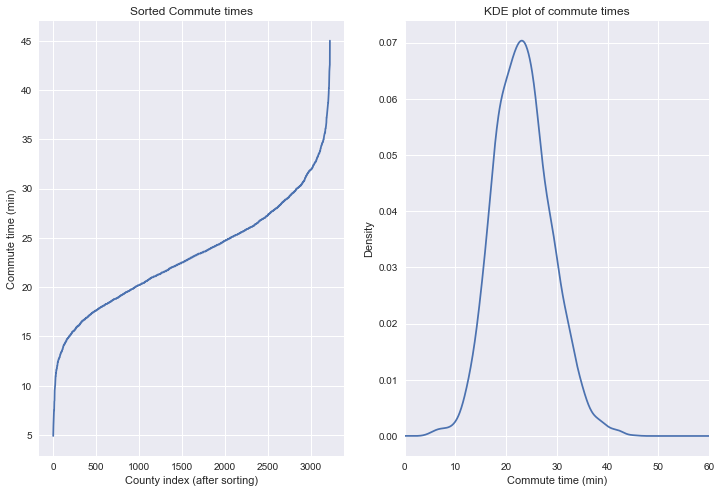

In [8]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

commute_times = census.groupby(["State", "County"])["MeanCommute"].median().sort_values().values
axarr[0].plot(commute_times)
axarr[0].set(title="Sorted Commute times", xlabel="County index (after sorting)", ylabel="Commute time (min)")

_ = (
        census
            .groupby(["State", "County"])["MeanCommute"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of commute times", xlabel="Commute time (min)", xlim=(0,60))
)

### Income

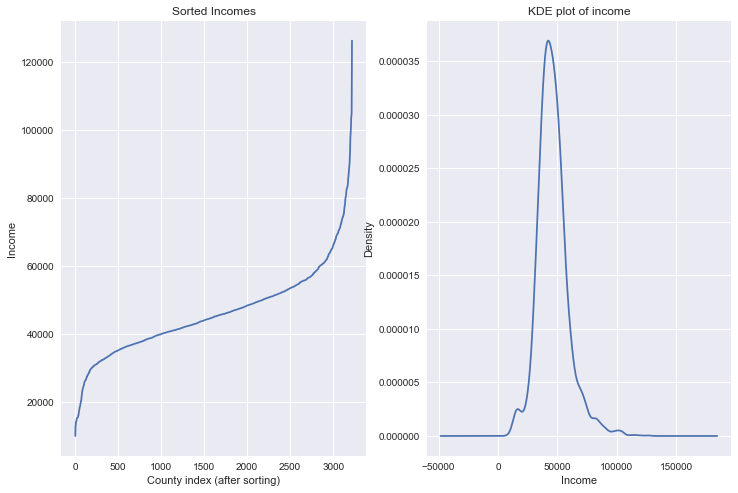

In [111]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

income = census.groupby(["State", "County"])["Income"].median().sort_values().values
axarr[0].plot(income)
axarr[0].set(title="Sorted Incomes", xlabel="County index (after sorting)", ylabel="Income")

_ = (
        census
            .groupby(["State", "County"])["Income"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of income", xlabel="Income")
)

### Commute times

WARNING: barplots take around 1min to load on my laptop

In [160]:
high_times = census[census.MeanCommute > 40].groupby(["State", "County"])
mid_times = census[(census.MeanCommute < 40) & (census.MeanCommute > 10)].groupby(["State", "County"])
low_times  = census[census.MeanCommute < 10].groupby(["State", "County"])
print(len(low_times), len(mid_times), len(high_times))

326 3202 201


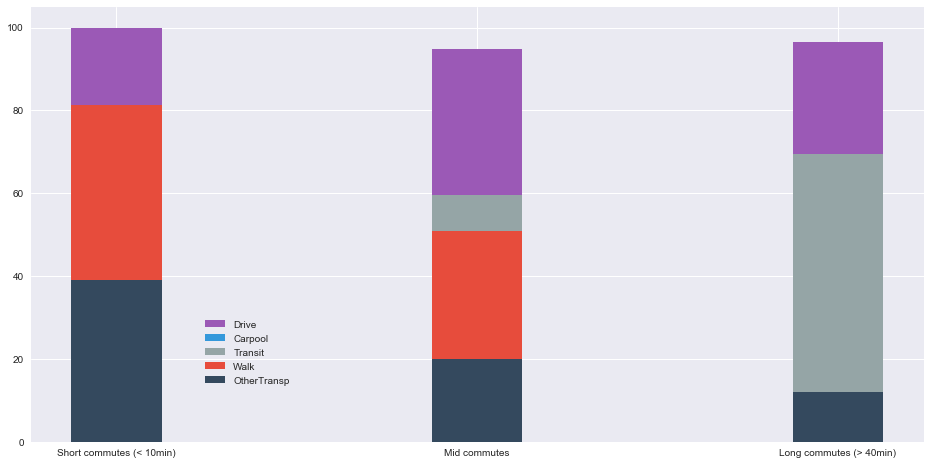

In [161]:
trans = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
c = {trans[i]: flatui[i] for i in range(5)}

plt.figure(figsize=(16, 8))
for tran in trans:
    plt.bar("Short commutes (< 10min)", low_times[tran].median(), width=0.25, align="center", label=tran, color=c[tran])
    plt.bar("Mid commutes", mid_times[tran].median(), width=0.25, align="center", color=c[tran])
    plt.bar("Long commutes (> 40min)", high_times[tran].median(), width=0.25, align="center", color=c[tran])
  
_ = plt.legend(bbox_to_anchor=(0.3, 0.3))